In [1]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# scale larger positive and negative values to between -1,1 depending on the largest value in the data

min_max_scalar = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [3]:
df = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Downloads\LogisticRegression-master\LogisticRegression-master\data.csv')

In [32]:
df.head()
# df.grade1.min()  # 30.05
# df.grade1.max()  # 99.82

# df.grade2.min()  # 30.60
# df.grade2.max()  # 98.86

,grade1,grade2,label;;;;
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


In [67]:
# formats the input data into two arrays, one for independant and other for dependant variables

X = df[['grade1', 'grade2']]
X = np.array(X)
X = min_max_scalar.fit_transform(X)
X[:5,]
# np.min(X)
# np.max(X)

array([[-0.86914432,  0.38930975],
       [-0.99346735, -0.6105909 ],
       [-0.83406432,  0.23923558],
       [-0.13647145,  0.6320027 ],
       [ 0.40388679,  0.31078429]])

In [57]:
Y = df["label;;;;"].map(lambda x:float(x.rstrip(';')))
Y = np.array(Y)
Y
# min(Y)
# max(Y)

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
# creating training and testing records

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

len(X_train)  # 67
len(X_test)   # 33
len(Y_train)  # 67
len(Y_test)   # 33

# X_train[:5,]
# X_test[:5,]
# Y_train[:5,]
# Y_test[:5,]

33

In [109]:
# train scikit learn model

clf = LogisticRegression()
clf.fit(X_train,Y_train)
print('Score Scikit learn: ', round(clf.score(X_test,Y_test),2))

Score Scikit learn:  0.85


In [61]:
# visualize data

pos = where(Y==1);pos
neg = where(Y==0);neg
# Y

(array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
        36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
        70, 78, 79, 86, 89, 92], dtype=int64),)

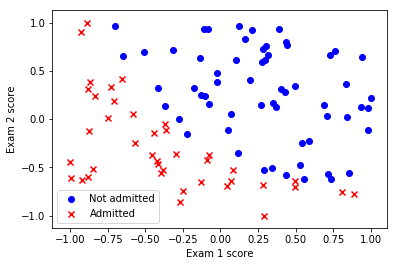

In [65]:
scatter(X[pos,0], X[pos,1], marker='o', c='b')
scatter(X[neg,0], X[neg,1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not admitted', 'Admitted'])

In [71]:
# The sigmoid function adjusts the cost function hypothesis to adjust the algorithm proportionally for worse estimates
def Sigmoid(z):
    G_of_Z = float(1.0/float(1.0 + math.exp(-1.0*z)))
    return G_of_Z

In [101]:
##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i] 
##This hypothesis will be used to calculate each instance of the Cost Function

def Hypothesis(theta, X):
    z = 0
    for i in range(len(theta)):
        z = z+X[i]*theta[i]
    return Sigmoid(z)

In [102]:
##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
            sumOfErrors += error
        const = -1/m
        J = const * sumOfErrors
        print ('cost is ', J )
        return J

In [103]:
##This function creates the gradient component for each Theta value 
##The gradient is the partial derivative by Theta of the current value of theta minus 
##a "learning speed factor aplha" times the average of all the cost functions for that theta
##For each Theta there is a cost function calculated for each member of the dataset
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

In [104]:
##For each theta, the partial differential 
##The gradient, or vector from the current point in Theta-space (each theta value is its own dimension) to the more accurate 
##point, is the vector with each dimensional component being the partial differential for each theta value
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

In [108]:
##The high level function for the LR algorithm which, for a number of steps (num_iters) finds gradients which take 
##the Theta values (coefficients of known factors) from an estimation closer (new_theta) to their "optimum estimation" which is the
##set of values best representing the system in a linear combination model
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            Cost_Function(X,Y,theta,m)
            print ('theta ', theta)	
            print ('cost is ', Cost_Function(X,Y,theta,m))
    Declare_Winner(theta)

In [106]:
##This method compares the accuracy of the model generated by the scikit library with the model generated by this implementation
def Declare_Winner(theta):
    score = 0
    winner = ""
    #first scikit LR is tested for each independent var in the dataset and its prediction is compared against the dependent var
    #if the prediction is the same as the dataset measured value it counts as a point for thie scikit version of LR
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
    my_score = float(score) / float(length)
    if my_score > scikit_score:
        print ('You won!')
    elif my_score == scikit_score:
        print ('Its a tie!')
    else:
        print ('Scikit won.. :(')
    print ('Your score: ', my_score)
    print ('Scikits score: ', scikit_score )

In [110]:
# These are the initial guesses for theta as well as the learning rate of the algorithm
# A learning rate too low will not close in on the most accurate values within a reasonable number of iterations
# An alpha too high might overshoot the accurate values or cause irratic guesses
# Each iteration increases model accuracy but with diminishing returns, 
# and takes a signficicant coefficient times O(n)*|Theta|, n = dataset length
initial_theta = [0,0]
alpha = 0.1
iterations = 1000
Logistic_Regression(X,Y,alpha,initial_theta,iterations)

cost is  0.006890168072197608
theta  [0.015808968977217012, 0.014030982200249273]
cost is  0.006890168072197608
cost is  0.006890168072197608
cost is  0.004397292227514621
theta  [1.1446039323506159, 1.030383323481578]
cost is  0.004397292227514621
cost is  0.004397292227514621
cost is  0.0033403295622074962
theta  [1.7920198800927762, 1.6251057941038252]
cost is  0.0033403295622074962
cost is  0.0033403295622074962
cost is  0.002747211194499778
theta  [2.2378078311381255, 2.0381775708737533]
cost is  0.002747211194499778
cost is  0.002747211194499778
cost is  0.002361197918475112
theta  [2.5764517180022444, 2.35358660097723]
cost is  0.002361197918475112
cost is  0.002361197918475112
cost is  0.0020872083946966843
theta  [2.8487364478320787, 2.608155678935002]
cost is  0.0020872083946966843
cost is  0.0020872083946966843
cost is  0.0018813766427206878
theta  [3.0758031030008572, 2.8210921909376734]
cost is  0.0018813766427206878
cost is  0.0018813766427206878
cost is  0.00172042415386

https://github.com/perborgen/LogisticRegression/blob/master/logistic.py